In this notebook, we will:

(1) Define a 2-D Gaussian mixture model (GMM). 

(2) Create a dataset by generating a set of samples from GMM in Step (1). 

(3) Use k-mediod algorithm with different similarity measurements to fit a model to the dataset in Step (2).

(4) Use expectation–maximization (EM) algorithm to fit a 2-D GMM to the dataset in Step (2). 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [14]:
#### Utility function for visualization

def draw_circles(Center_Coord_x, Center_Coord_y, Radius, Color, ax):
    
    Theta = np.linspace(-2*np.pi, 2*np.pi, 300)
    
    x_vect = Center_Coord_x + Radius*np.cos(Theta)
    y_vect = Center_Coord_y + Radius*np.sin(Theta)
    
    ax.plot(x_vect, y_vect, Color)
    ax.scatter(Center_Coord_x, Center_Coord_y, marker='x', c=Color)

Here, we will define a 2-D GMM with 3 mixture components. We need to define:

(1) The mean (a 2-D vector) for each mixture component.

$\qquad \mu = \begin{bmatrix}
\mu_1 \\
\mu_2
\end{bmatrix}$

(2) The covariance matrix (2x2 matrix) for each mixture component. <br>
- Here, we choose the covariance matrices to be a scaled identity matrix for simplicity

$\qquad \Sigma = \sigma^2 \begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}
$

(3) The mixture weight of each mixture component.

$\qquad \pi_0$ and $\pi_1$ and $\pi_2$



In [15]:
##### A 2-D GMM model with 3 mixture components
##### Component 0: Mu = [1,1] 
#####              Sigma = 1 (Covariance Matrix: 1xI) 
##### Component 1: Mu = [5,-5]
#####              Sigma = 2 (Covariance Matrix: 4xI) 
##### Component 2: Mu = [10,5]
#####              Sigma = 3 (Covariance Matrix: 9xI) 
##### Mixture Weights: 
#####              p0=0.2, p1=0.5, p2=3 

#####----------------------------------------------------
##### Please Feel free to modify the parameters

Mus = np.array([[1,1],[5,-5],[10,5]]).astype(float)

Sigmas = np.array([1, 2, 3])

Weights = np.array([2,5,3])
Weights = Weights / Weights.sum()

#### Define a 2-D identity matrix
I_Mat = np.eye(Mus.shape[1])

Next, we will create a dataset by generating samples from the GMM defined above. For each data sample, the generation process is:

(1) Draw a label according to GMM mixturee weights for this data sample.  
- The label indicates which 2-D Gaussian does the data sample come from. 

(2) Generate the data (2-D coordinates in this case) from the Gaussian pdf indicated by the label. 

In [16]:
#### Generate 200 samples from the GMM
Num_Samples = 200

#### Draw labels based on mixture weights
Labels = np.random.choice(3, Num_Samples, replace=True, p=Weights)

#### Initialize data by 0s
Data = np.zeros((Num_Samples, Mus.shape[1]))
#### Sample Data:
####    Given the label of a data point, go to the correseponding 
####    Gaussian distribution and draw a sample from that distribution
for i in range(Num_Samples):
    Data[i,:] = np.random.multivariate_normal(Mus[Labels[i],:], 
                                              Sigmas[Labels[i]]**2 * I_Mat, 
                                              size=1)

Next, we will visualize the the 2-D GMM and the dataset. 

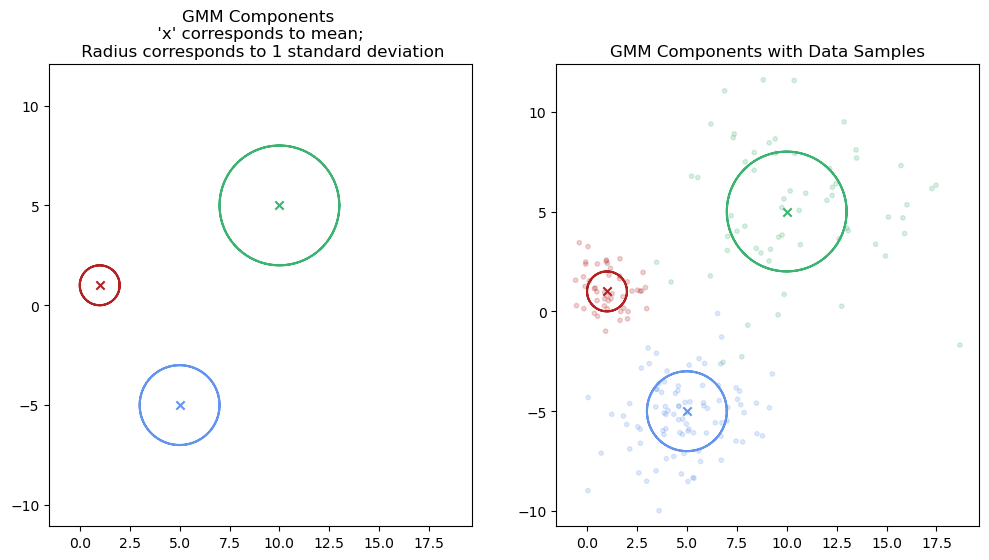

In [17]:
##### Visualization 

#### Define Color for visualization
#### Gaussian Component 1 -> 'firebrick'
#### Gaussian Component 2 -> 'cornflowerblue'
#### Gaussian Component 3 -> 'mediumseagreen'
Colors = np.array(['firebrick', 'cornflowerblue', 'mediumseagreen'])

Data_Color = Colors[Labels]

#####################################################################################

fig, ax = plt.subplots(1,2, figsize=(12, 6), sharex=True)

ax[0].axis('equal')
draw_circles(Center_Coord_x=Mus[0,0], Center_Coord_y=Mus[0,1], Radius=Sigmas[0], Color=Colors[0], ax=ax[0])
draw_circles(Center_Coord_x=Mus[1,0], Center_Coord_y=Mus[1,1], Radius=Sigmas[1], Color=Colors[1], ax=ax[0])
draw_circles(Center_Coord_x=Mus[2,0], Center_Coord_y=Mus[2,1], Radius=Sigmas[2], Color=Colors[2], ax=ax[0])
ax[0].set_title('GMM Components \n \'x\' corresponds to mean; \n Radius corresponds to 1 standard deviation')

ax[1].axis('equal')
draw_circles(Center_Coord_x=Mus[0,0], Center_Coord_y=Mus[0,1], Radius=Sigmas[0], Color=Colors[0], ax=ax[1])
draw_circles(Center_Coord_x=Mus[1,0], Center_Coord_y=Mus[1,1], Radius=Sigmas[1], Color=Colors[1], ax=ax[1])
draw_circles(Center_Coord_x=Mus[2,0], Center_Coord_y=Mus[2,1], Radius=Sigmas[2], Color=Colors[2], ax=ax[1])
ax[1].scatter(Data[:,0], Data[:,1], marker='o', s=10, c=Data_Color, alpha=0.2)
ax[1].set_title('GMM Components with Data Samples')

plt.show()

<p>
In this section, we will fit the dataset using k-medoid algorithm. 
</p>
<p>
Specifically, we will run k-medoid algorithm using Euclidean distance and cosine similarity as distance measurements respectively. 
</p>
<p>
By changing 'N_Cluster_KMedoids' and 'DistMetric_KMedoids' in the following cell, you can change the number of clusters and distance measurements respectively. Please feel free to try different settings.  
</p>

Note: If you are not familiar with cosine similarity, [here](https://www.youtube.com/watch?v=q6VmjwW8jTA&ab_channel=DonaldJordan) is a nice video about cosine similarity. 




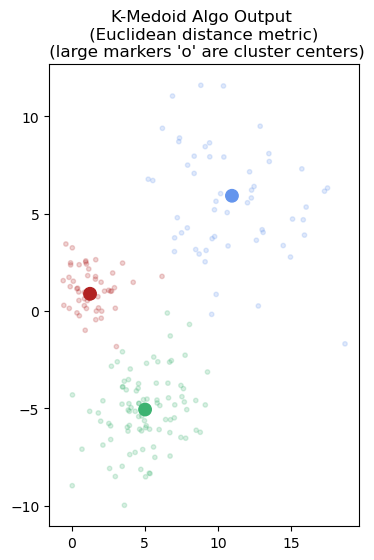

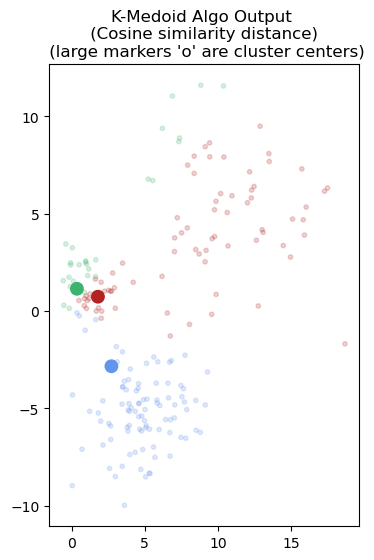

In [18]:
#### You need to install sklearn_extra before running the codes below
#### Instructions to install sklearn_extra can be found here: 
#### https://scikit-learn-extra.readthedocs.io/en/stable/install.html
from sklearn_extra.cluster import KMedoids


#### Specify number of clusters 
N_Cluster_KMedoids = 3

#### Define distance metric in k-medoid algorithm
##### You can find more distance metreices here: 
########### https://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
DistMetric_KMedoids = 'euclidean'


################################################################################
###### Fit data using k-medoid alogrithm with Euclidean distance
kmedoids_eu = KMedoids(n_clusters = N_Cluster_KMedoids, 
                       metric = DistMetric_KMedoids).fit(Data)

Data_Color_KMedoids_eu = Colors[kmedoids_eu.labels_]
Center_Color_KMedoids_eu = Colors[np.arange(N_Cluster_KMedoids)]

plt.subplots(figsize=(4, 6))
plt.scatter(Data[:,0], Data[:,1], marker='o', s=10, c=Data_Color_KMedoids_eu, alpha=0.2)
plt.scatter(kmedoids_eu.cluster_centers_[:,0], 
            kmedoids_eu.cluster_centers_[:,1], 
            marker='o', s=80, c = Center_Color_KMedoids_eu, alpha=1)
plt.title('K-Medoid Algo Output \n (Euclidean distance metric) \n (large markers \'o\' are cluster centers)')
plt.show()


################################################################################
###### Fit data using k-medoid alogrithm with cosine similarity
DistMetric_KMedoids = 'cosine'
kmedoids_cs = KMedoids(n_clusters = N_Cluster_KMedoids, 
                       metric = DistMetric_KMedoids).fit(Data)

Data_Color_KMedoids_cs = Colors[kmedoids_cs.labels_]
Center_Color_KMedoids_cs = Colors[np.arange(N_Cluster_KMedoids)]
plt.subplots(figsize=(4, 6))
plt.scatter(Data[:,0], Data[:,1], marker='o', s=10, c=Data_Color_KMedoids_cs, alpha=0.2)
plt.scatter(kmedoids_cs.cluster_centers_[:,0], 
            kmedoids_cs.cluster_centers_[:,1], 
            marker='o', s=80, c = Center_Color_KMedoids_cs, alpha=1)
plt.title('K-Medoid Algo Output \n (Cosine similarity distance) \n (large markers \'o\' are cluster centers)')
plt.show()

In this section of the notebook, we are going to run EM algorithm to fit a GMM to the dataset. 

Firstly, we need to implement E-step and M-step in the EM algorithm. 

In [19]:
####### Define EM Algo

def E_Step(Data, Mus, Sigmas, Weights):
    N_Data = Data.shape[0]
    N_Components = Weights.size
    Dim = Data.shape[1]
    I_Mat = np.eye(Dim)
    
    Data_Dist_Weights = np.zeros((N_Data, N_Components))
    
    for i_Data in range(N_Data):
        for i_Comp in range(N_Components):
            Current_Mu = Mus[i_Comp,:]
            Current_Sigma = Sigmas[i_Comp]
            Data_Dist_Weights[i_Data, i_Comp] = Weights[i_Comp] * \
                    multivariate_normal.pdf(x = Data[i_Data,:], 
                                            mean = Current_Mu, 
                                            cov = Current_Sigma**2 * I_Mat)
        
        Data_Dist_Weights[i_Data, :] = Data_Dist_Weights[i_Data, :] / Data_Dist_Weights[i_Data, :].sum()
        
    return Data_Dist_Weights
        
            

def M_Step(Data, Data_Dist_Weights):
    N_Data = Data.shape[0]
    Dim = Data.shape[1]
    N_Cluster = Data_Dist_Weights.shape[1]
    
    Norm_Consts = Data_Dist_Weights.sum(axis=0)
    
    Mus = (Data.transpose() @ Data_Dist_Weights).transpose() / Norm_Consts.reshape(-1,1)
    
    Weights = Norm_Consts / N_Data
    
    Sigma_Squares = np.zeros(N_Cluster)
    for k in range(N_Cluster):
        Temp = ((Data.transpose() - Mus[k,:].reshape(-1,1))**2).sum(axis=0)
        
        Sigma_Squares[k] = \
            np.dot(Temp, Data_Dist_Weights[:,k])/(Norm_Consts[k] * Dim)
            
    
    return Mus, np.sqrt(Sigma_Squares), Weights
    
    





Run EM algorithm with 3 mixture components and visualize the result. 

Instructions: 

(1) You can run the codes in the cell below directly and see what happen. <br>
- In the default setting ('Mean Initialization 1'), we choose a good initialization for the means in GMM. 
- These mean initializations are closed to the original means that we used to generate the data and they should bring a good result to the EM algorithm. 


(2) After Step (1), you can change the mean initializations by uncommenting the code under the line <strong>'Mean Initialization 2: .....'</strong>. <br>
- In this setting ('Mean Initialization 2'), we randomly pick 3 data samples from the original dataset as 3 means for the GMM. 
- In this setting, you can run the code multiple times. 
    - Among those different runs, you might observe different results due to the difference in initialization. 


(3) After Step (1) and (2), you can change the mean initializations by uncommenting the code under the line <strong>'Mean Initialization 3: .....'</strong>. <br>

- This setting ('Mean Initialization 3'), we choose 3 points that are far away from the original dataset as 3 initial means for the GMM.

- In this setting, <strong> we expect you to run into numerical error!</strong>. 
    - Reason 1: since those 3 initial means are far away from the original dataset, for each data point in the data set, the likelihood would be small. 
    - Reason 2: the EM algorithm we provide in this notebook is a naive implementation. It **does not** have features to deal with numerical issues like the small likelihoods mentioned in Reason 1.
     
In your project in this unit, you are going to implement a more numerically stable EM algorithm :-) <br>


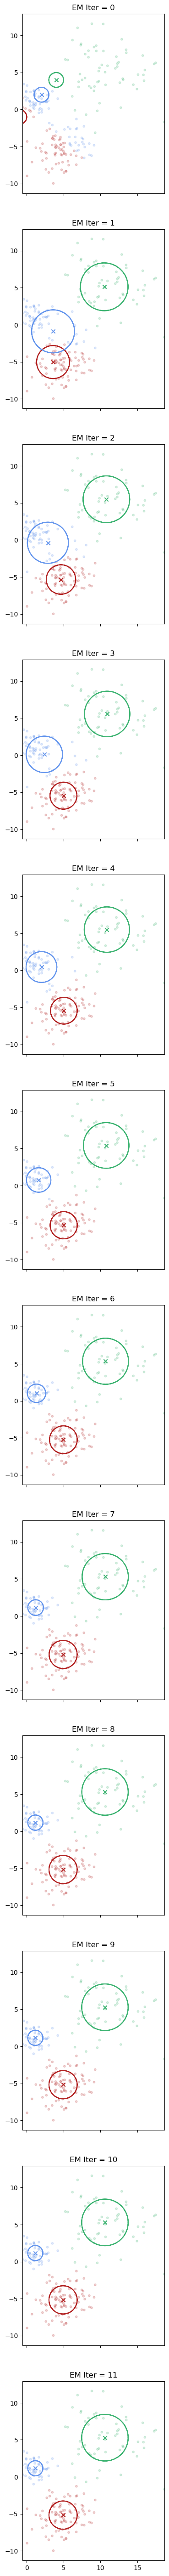

In [20]:
###### Run EM Algo and Visualize result


##### Initialize
######## You can change your initialization here

###### Mean Initialization 1: Good Initialization Example
Mus_Init = np.array([[-1,-1], [2,2], [4,4]]).astype(float) 

###### Mean Initialization 2: Pick 3 original data points as initial means
# Mus_Init = Data[np.random.randint(low=0, high=Data.shape[0], size=3, dtype=int), :]

###### Mean Initialization 3: Bad initialization
# Mus_Init = np.array([[-100,-1], [200,2], [4,400]]).astype(float) 



Sigmas_Init = np.array([1, 1, 1])

Weights_Init = np.array([1,1,1])
Weights_Init = Weights_Init / Weights.sum()


##### Run 12 iters of EM
Num_Iter = 12

##### Display setting
fig, ax = plt.subplots(Num_Iter, figsize=(4, 6*Num_Iter), sharex=True)

Current_Mus = Mus_Init
Current_Sigmas = Sigmas_Init
Current_Weights = Weights_Init
for Current_Iter in range(Num_Iter):
    Data_Dist_Weights = E_Step(Data = Data, 
                               Mus = Current_Mus, 
                               Sigmas = Current_Sigmas, 
                               Weights = Current_Weights)
    
    
    ###### Assign Labels based on the max value from the E-step result
    Temp_Labels = Data_Dist_Weights.argmax(axis=1)
    Temp_Data_Color = Colors[Temp_Labels]
    
    
    ax[Current_Iter].axis('equal')
    ax[Current_Iter].set_title('EM Iter = ' + str(Current_Iter))
    ax[Current_Iter].set_xlim([Data[:,0].min(), Data[:,0].max()])
    ax[Current_Iter].set_ylim([Data[:,1].min(), Data[:,1].max()])
    draw_circles(Center_Coord_x=Current_Mus[0,0], Center_Coord_y=Current_Mus[0,1],
                 Radius=Current_Sigmas[0], Color=Colors[0], ax=ax[Current_Iter])
    draw_circles(Center_Coord_x=Current_Mus[1,0], Center_Coord_y=Current_Mus[1,1], 
                 Radius=Current_Sigmas[1], Color=Colors[1], ax=ax[Current_Iter])
    draw_circles(Center_Coord_x=Current_Mus[2,0], Center_Coord_y=Current_Mus[2,1], 
                 Radius=Current_Sigmas[2], Color=Colors[2], ax=ax[Current_Iter])
    ax[Current_Iter].scatter(Data[:,0], Data[:,1], marker='o', c=Temp_Data_Color, s=10, alpha=0.2)
    
    
    Next_Mus, Next_Sigmas, Next_Weights = M_Step(Data = Data, 
                                                 Data_Dist_Weights = Data_Dist_Weights)
    
    
    Current_Mus = Next_Mus
    Current_Sigmas = Next_Sigmas
    Current_Weights = Next_Weights
    
    
    
    
    